# Pulling Stock Data
This is a Python notebook to analyze Stock data based on ticker symbols.


## 0. Programming in Python
Let's start by seeing how to make variables, functions, and logic in Python.

### Variables
Variables can take on many data types, from `'Strings'` to numbers (`0`), `True`/`False` and even functions.

Let's create a variable called `x` and assign it a string. 

Type **`x = 'Hello world!'`** in the box below, then press **`Shift + Enter`** to execute the code.

Nothing happened... That's because we've only just created the variable `x`. 

Now to show the value of the variable, we need to type **`x`**. Again, press **`Shift + Enter`** to execute the code.

### Functions

We can build and use functions to perform some action.

Functions can operate on one or more `variables` that get defined when you initially create the function. When definied, these variables are just placeholders for what to do with any data that gets sent to the function when it is used.

Python uses indentation instead of `{` and `}` like in JavaScript or CSS. So be careful how you indent your code.

Below, type **`def myFunction(y):`** on the first line, then hit `Enter` and type **`return y + 3`**. The second line should be automatically indented. Press **`Shift + Enter`** to save that function.

In the box below that, type **`myFunction(3)`** - what do you expect it to return when you press **`Shift + Enter`**?

### Logic
Logic is the last piece of the programming foundation; this will test some comparison, and depending on whether the comparison is `True` or `False`, one outcome will result.

We've put the basic structure in the box below, but you need to add a comparison in the `()` to test: e.g. **`(5 > 3)`** or **`('a' == 'a')`**. Press **`Shift + Enter`** to run the logic below.

In [12]:
if ():
   print 'The comparison is True'
else:
   print 'The comparison is False'

The comparison is False


### Packages
Packages are the secret sauce of Python - they are the libraries of pre-existing code that we bring in to perform complex functions and streamline our code. To use a package we have to import it before accessing it's contents. To that we just type `import package_name`.

Let's start by importing the data scientist's best friend, `numpy`. It is the package for "scientific computing", which means it lets us manipulate large arrays of numbers.

To save space in our code when we use a package we can shorten it's name when we import it by typing `import package_name as short_name`. Let's **import `numpy`, giving it the shortened name `np`**, as is common practice.

In [13]:
import numpy as np

If it worked, nothing should have happened.

So let's test it out. 

A common numpy function is `np.array()`, which  will take any list of numbers, formatted like this: `[1,2,3,4,5,6,7]`, and convert them in to an array.

Another common function is `np.log()`. This takes the log of any number. This function is useful for scaling down numbers across a big range. 

Using numpy functions, create an array of the following numbers: `[1,8,27,64]`, and take the log of that array. Type **`np.log(np.array([1,8,27,64])`** and run the code below:

Your output should look like this:

`array([ 0.        ,  2.07944154,  3.29583687,  4.15888308])`

### Wrap Up
So that's it!  Variables, functions, logic and packages are the building blocks of programming in any language.

Now that you've got a handle on those, we're going to get a bit more complicated working with our data.

*Note: Just like above, you'll need to press `Shift + Enter` to run any code in an `In [ ]:` box.*

## <font color='green'>You're now finished with this section! Let your facilitators know, and have a break.</font>

![done](https://media.giphy.com/media/XreQmk7ETCak0/giphy.gif)

## 1. Sourcing Data
To begin working with our data, let's use an API called [Quandl](https://www.quandl.com) to bring in stock data.

We need to first `import quandl` to get the Quandl library of functions, then give the API our API key to get access to the data. The key for today is **`Byjzu4U8rmR1iEhZnp7V`** - copy and paste that between the `""` below.

In [14]:
!pip install quandl # install quandl
!pip install --upgrade pandas # upgrade pandas (some housekeeping)

import quandl
quandl.ApiConfig.api_key = "Byjzu4U8rmR1iEhZnp7V "

Requirement already up-to-date: pandas in /Users/greg/anaconda/lib/python2.7/site-packages
Requirement already up-to-date: python-dateutil in /Users/greg/anaconda/lib/python2.7/site-packages (from pandas)
Requirement already up-to-date: numpy>=1.7.0 in /Users/greg/anaconda/lib/python2.7/site-packages (from pandas)
Requirement already up-to-date: pytz>=2011k in /Users/greg/anaconda/lib/python2.7/site-packages (from pandas)
Requirement already up-to-date: six>=1.5 in /Users/greg/anaconda/lib/python2.7/site-packages (from python-dateutil->pandas)


Now that we've got our connection to quandl, let's pull a single stock (`AAPL`) and store that in a variable called `data`.

Add **`WIKI/AAPL`** between the `""` below.

In [15]:
data = quandl.get("WIKI/AAPL", rows=5)

To find out the type of data, we can type **`print type(data)`**.

In [16]:
print type(data)

<class 'pandas.core.frame.DataFrame'>


And if we want to look at the data itself, we can type **`data`** below.

In [17]:
data

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2017-10-19,156.75,157.08,155.02,155.980,42111326.0,0.0,1.0,156.75,157.08,155.02,155.980,42111326.0
2017-10-20,156.61,157.75,155.96,156.160,23612246.0,0.0,1.0,156.61,157.75,155.96,156.160,23612246.0
2017-10-23,156.89,157.69,155.50,156.170,21654461.0,0.0,1.0,156.89,157.69,155.50,156.170,21654461.0
2017-10-24,156.29,157.42,156.20,157.100,17137731.0,0.0,1.0,156.29,157.42,156.20,157.100,17137731.0
2017-10-25,156.91,157.55,155.27,156.405,20126554.0,0.0,1.0,156.91,157.55,155.27,156.405,20126554.0


To assess the health of each stock, let's find the `Close` price for each stock. If you notice above, that's the 4th column.

Based on Quandl's [API documentation](https://docs.quandl.com/docs/time-series-2), we can extract just that column by adding **`.4`** after `WIKI/AAPL` to get **`WIKI/AAPL.4`**:

In [18]:
data = quandl.get("WIKI/AAPL.4", rows=5, collapse='monthly')
data

,Close
Date,
1980-12-31,34.13
1981-01-31,28.25
1981-02-28,26.50
1981-03-31,24.50
1981-04-30,28.38


That's great! But we want to show data for the last 10 years.

First, we need to have Python tell us what today's date is and subtract 10 years from that. Replace `#TODO` with **``print start_date``** after the definition to check the value makes sense:

In [19]:
import datetime
start_date = (datetime.datetime.now() - datetime.timedelta(days=10*365)).strftime('%Y-%m-01')
print start_date

2007-10-01


Now we need to add a new parameter to our Quandl get request. After `collapse='monthly'`, add a comma and then **`start_date=start_date`** inside the parenthesis.

Then, to save space in the notebook, we're only going to show the top five rows of data using `data.head(5)`.

How could you show the top 10 rows instead?

In [20]:
data = quandl.get("WIKI/AAPL.4", rows=120, collapse='monthly', start_date=start_date)
data.head(5)

,Close
Date,
2007-10-31,189.95
2007-11-30,182.22
2007-12-31,198.08
2008-01-31,135.36
2008-02-29,125.02


Python comes with a number of great visualization tools built in.

Let's do a quick visualization of the data to see if it looks right:

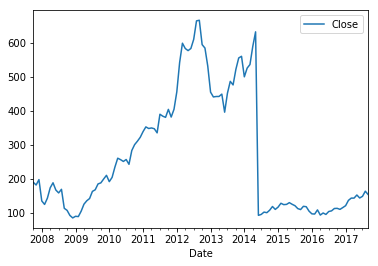

In [21]:
%matplotlib inline
!pip install mpld3 # install a package to let us zoom into our plots
import mpld3
mpld3.enable_notebook()

ax = data.plot()

In [22]:
start_date

'2007-10-01'

Uh-oh! Looks like there's a problem: There's a big drop in AAPL stock in 2014! **If you don't see this, check with a facilitator**

Why?!  Well, a quick Google shows they [split their stock](https://www.washingtonpost.com/news/the-switch/wp/2014/06/09/apples-stock-price-just-dropped-more-than-500-a-share-but-dont-panic/). 

Luckily, Quandl has accounted for that. Instead of `Close`, we'll need to use the `Adjusted Close` price (column 11) from Quandl.

Modify the code below to get the **11**th column instead of the 4th.

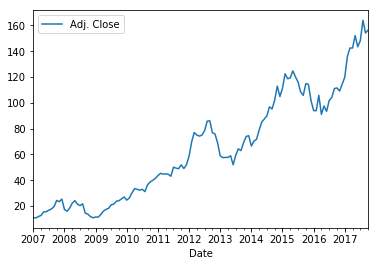

In [23]:
data = quandl.get("WIKI/AAPL.11", collapse='monthly', start_date = '2007-01-01')

# Now plot the data:
data.plot()

Great! Let's now focus on the full portfolio.


## <font color='green'>You're now finished with this section! Let your facilitators know, and have a break.</font>

![done](https://media.giphy.com/media/3o7TKLpxzkbvjwEgSc/giphy.gif)

## 2. Sourcing more Data

Now that we have access to stock data, let's pull in our list of Warren's 2003 aquisitions.

First, we need to bring in the cleaned CSV file we exported from Open Refine, and store it as a variable. Let's call it `buffett`.

Now let's take the output of the Open Refine scrubbing step and replace **`your_clean_csv.csv`** with that output:

In [24]:
from pandas import read_csv
buffett = read_csv('WB_portfolio_for_Decoded - 2017_0824.csv')
buffett.head(5)

,COMPANY,TICKER,COMPANY.1,# OF SHARES,PRICE (8/24/2017),CITY,PURCHASE DATE,REGION,CEO,EMPLOYEES,WARREN COMMENT
0,Kraft Heinz,KHC,Kraft Heinz (KHC),"325,634,818",$82.80,"Chicago, IL",9/27/2005,Central,Bernard Hees (2015–),"41,000 (2017)",Without a doubt
1,Wells Fargo,WFC,Wells Fargo (WFC),"467,987,270",$52.16,"San Francisco, CA",7/7/2002,West,"Timothy J. Sloan (Oct 12, 2016–)",NaN,It is decidedly so
2,Apple Inc.,AAPL,Apple Inc. (AAPL),"130,191,960",$159.27,"Cupertino, CA",9/23/2006,West,Tim Cook,NaN,Concentrate and ask again
3,The Coca Cola Company,KO,The Coca Cola Company (KO),"400,000,000",$45.41,"Atlanta, GA",12/10/2003,Southeast,"James Quincey (May 1, 2017–)",NaN,Reply hazy try again
4,American Express Co,AXP,American Express Co (AXP),"151,610,700",$85.36,"New York City, NY",6/2/2013,Northeast,Kenneth I. Chenault (Jan 2001–),NaN,It is decidedly so


Next we want to choose some of those stocks for our analysis. We could either type out the ticker symbol (e.g. `MSFT`) by hand, or we could refer to the `buffett` variable in order to select the ticker symbols. Let's choose the first 3 stocks from `buffett`. Replace `buffett['TICKER'][0:0]` with `buffett['TICKER']`**`[0:3]`**. If your column is called something different (like `Ticker`) then update accordingly:

In [25]:
symbols = [ 'WIKI/%s.11' % ticker for ticker in buffett['TICKER'][0:3] ]
symbols

['WIKI/KHC.11', 'WIKI/WFC.11', 'WIKI/AAPL.11']

We can now load in the symbol data from quandl.

Let's save our progress by pulling this in to a new dataframe, `data2`. This means that if we run in to any problems with `data2`, we'll always have our original `data` to fall back on:

In [26]:
data2 = quandl.get(symbols, rows=121, collapse='monthly', start_date=start_date)
data2.head(5)

,WIKI/KHC - Adj. Close,WIKI/WFC - Adj. Close,WIKI/AAPL - Adj. Close
Date,,,
2007-10-31,NaN,26.129162,24.411222
2007-11-30,NaN,25.166378,23.417810
2007-12-31,NaN,23.428090,25.456041
2008-01-31,NaN,26.446814,17.395647
2008-02-29,NaN,22.916878,16.066812


You might see `NaN` ("Not a Number") where you'd expect to see numbers. That just means we have some missing data; we won't worry too much about that at this point. 

Let's have a look at the end of the data. To do this we look at the "tail". Type **`data2.tail(5)`** below and run the cell:

In [27]:
data2.tail(5)

,WIKI/KHC - Adj. Close,WIKI/WFC - Adj. Close,WIKI/AAPL - Adj. Close
Date,,,
2017-06-30,85.005796,55.009891,143.438008
2017-07-31,86.832597,53.550505,148.248489
2017-08-31,80.750000,51.070000,164.000000
2017-09-30,77.550000,55.150000,154.120000
2017-10-31,77.330000,55.265000,156.405000


Let's clean up the column name to just their symbol name by removing `WIKI/` and ` - Close` from each column name.

We can iterate over the columns using the `for col in data.columns` syntax. To look at the final 5 rows of our dataframe, **replace `#TODO` with `data2.tail(5)`**:

In [28]:
data2.columns = [col.replace(' - Adj. Close','').replace('WIKI/','') for col in data2.columns]
data2.tail(5)

,KHC,WFC,AAPL
Date,,,
2017-06-30,85.005796,55.009891,143.438008
2017-07-31,86.832597,53.550505,148.248489
2017-08-31,80.750000,51.070000,164.000000
2017-09-30,77.550000,55.150000,154.120000
2017-10-31,77.330000,55.265000,156.405000


Let's have another quick look at the data, to make sure everything looks good.

Add the code to plot `data2` (hint: you've used similar code above already for `data`):

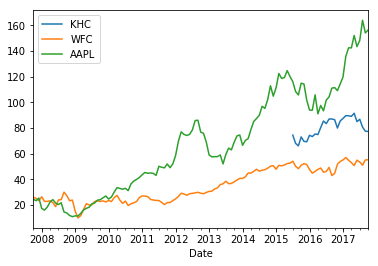

In [29]:
data2.plot()

Explore the data by using the icons in the bottom left corner of the plot. 

It looks like we have some incomplete data.

Further investigation reveals that we only have data for Kraft Heinz (KHC) from July 2015 onwards. We'll need to remember this for later, as this might affect our analysis.

## <font color='green'>You're now finished with this section! Let your facilitators know, and have a break.</font>

![done](https://media.giphy.com/media/26FL2NwYBOq3Z6C6Q/giphy.gif)

## 3. Analysis

## <font color='orange'>Please wait for your instructor to begin the Analysis section before proceeding</font>

Data analysis is all about answering questions. In this case Warren has one question - what will the prices of his stocks be in the future?

To answer that question we are going to build our own Time Series Forecasting model. This model will use the historic data that we have collected to forecast predictions for the future. 

As we build our model, we're going to use some dummy sales data, stored in `hat-sales.csv`, to test our model as we go. Once it's built, we'll apply it to our stock data.

Let's start by creating a dataframe variable called `df` and using reading `pd.read_csv` to read our data in. Complete the code below, passing the function three inputs:
    - 'hat-sales.csv'
    - index_col = ['month']
    - parse_dates = ['month']

And then view our data on the line below using `data.head(5)`:

In [42]:
df = pd.read_csv('hat-sales.csv', index_col = ['month'], parse_dates = ['month'])
df.head(5)

,hats_sold
month,
2005-11-01,141
2005-12-01,157
2006-01-01,185
2006-02-01,199
2006-03-01,203


Now let's plot it with `df.plot()`:

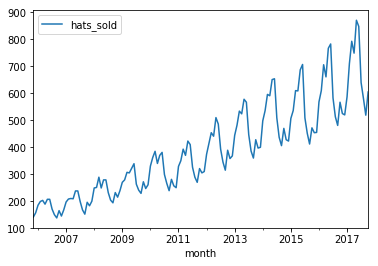

In [43]:
df.plot()

What observations can we make about the behavior of the data that might help our predictions?

When looking at time series data, it's important to look for patterns that our model can try to use to make a prediction. 
We do this by asking four central questions:

 1. Is there a **Trend**?.........................The direction that the data is headed in, increasing or decreasing. Data with no up or down trend is said to be "stationary".
 2. Is there **Changing Variance**?......Time series data tends to fluctuate a lot. Does the scale of those fluctuations change over time? 
 3. Is there **Seasonality**?..................Patterns associated with days, weeks, months
 4. Are there **Long-run Cycles**?.......Patterns occuring beyond the scale of months, not described by seasonal change. 
 
So first of all, let's have a look at our **trend**.

The trend between two points is defined as the difference between one number and a number after it. If one month I sell 200 hats and the next day I sell 220, I'm trending up by 220 hats a month!

We want to know if that month-to-month trend is consistent over the entire time period.

What we want is a record of all the differences between adjacent months. We can do this by subtracting the list of previous month sales from the list of current month sales. This method is called *differencing*.

Below, create a new column in our dataframe by typing  **`df['diff_hats_sold']`** and set it equal to **`df.hats_sold`** minus **`df.hats_sold.shift()`**, which shifts the column by one (giving you the previous month's values).

Have a look at the result with **`df.head(10)`**:

In [45]:
df['diff_hats_sold'] = df.hats_sold - df.hats_sold.shift()
df.head(10)

,hats_sold,diff_hats_sold
month,,
2005-11-01,141,NaN
2005-12-01,157,16.0
2006-01-01,185,28.0
2006-02-01,199,14.0
2006-03-01,203,4.0
2006-04-01,189,-14.0
2006-05-01,207,18.0
2006-06-01,207,0.0
2006-07-01,171,-36.0


Now let's plot the result by writing **`df.plot(y='diff_hats_sold')`**:

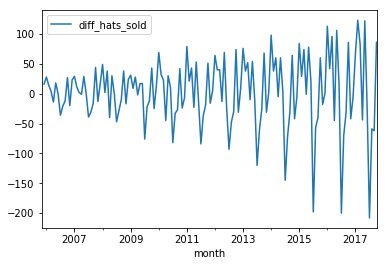

In [46]:
df.plot(y='diff_hats_sold')

Interesting. So as we can see, differencing has eliminated our trend, so now the data is stationary. This is good, it means that the trend was simple, so we easily use it to predict the future. If wasn't stationary after differencing (still had some obvious trend) we would have to keep differencing until we induced stationarity.

What is now obvious about how our data is changing over time? It looks like variance increases a lot.

A common trick to controlling variance is to *take the log*. As we saw in the intro, this has the effect of keeping big changes in a consistent range.

But wait! It looks like the differenced data has a lot of negative values - and you can't take the log of negative values. So rather than differencing and then logging, we're going to have to log first and then difference.

Let's take the log of our original data. Create a new column called `'log_hats_sold'` and set it equal to the log of `df.hats_sold`.

Then, on the second line, plot the column using **`df.plot(y='log_hats_sold')`**.

*NOTE: recall that the function to call is `np.log()`*

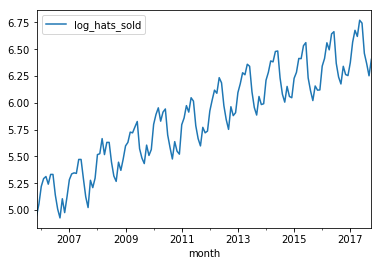

In [47]:
df['log_hats_sold'] = np.log(df.hats_sold)
df.plot(y='log_hats_sold')

Excellent, should look like our variance is handled!

Now let's take the difference of this new column, the same way we did before. The only difference is this time we're differencing the `'log_hats_sold'` column.

Create a new column called `'difflog_hats_sold'`, set it equal to the `'log_hats_sold'` column differenced, and plot `'difflog_hats_sold'` on the second line:

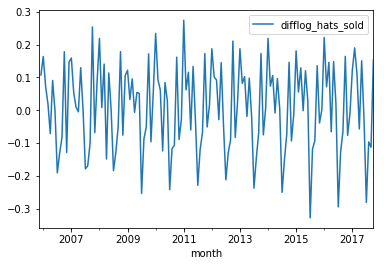

In [50]:
df['difflog_hats_sold'] = df.log_hats_sold - df.log_hats_sold.shift()
df.plot(y='difflog_hats_sold')

Ok, the data is now starting to look really predictable - so why is this useful?

By eliminating the trend and variance, we've actually figured out how they work, and so can use them in our model to create predictions 

To model trend we differenced and to model variance, we logged. So far, so simple.

Now, to model the seasonality that we can see, we will need a little help. A quick google search tells us that one of the best python models for time series forecasts is ARIMA:

 - The "AR" stands for Auto-Regressive, which means that previous values predict future values (if values are rising, they will probably continue to rise)

 - The "I" stands for Integrated, which means that it will do the differencing for us.

 - The "MA" stands for Moving Average, which is how it models seasonality and trend.

First, let's import the model: 

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

This model is really a function which takes two main arguments:
 - The name of the data
 - A set of 3 parameters, (p,d,q). d tells the model how many times to difference the data and p and q control how complex the model is (higher numbers are more complex, and take longer to run)
 
First we need to define our model, which is done on the first line below. Next, we fit the model, by feeding the data through it.

Fit the model by creating a variable called `results_ARIMA` and setting it equal to `model.fit()`:

In [54]:
model = ARIMA(df.log_hats_sold, order=(2, 1, 2))  
results_ARIMA = model.fit()

Now we're going to check if the fit was good by plotting `results_ARIMA`, which is our fitted model of the real data, against `df.difflog_hats_sold`:

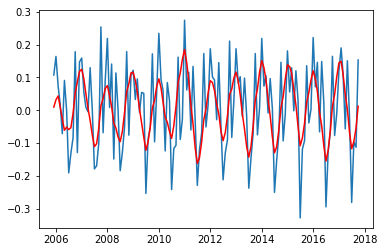

In [55]:
import matplotlib.pyplot as plt
plt.plot(df.difflog_hats_sold)
plt.plot(results_ARIMA.fittedvalues, color='red')

Looks good. Our model will never be able to capture some of the "spikeyness" of the data, as that can often be random, unpredictable noise.

To convert this model back to our original data and pull the prediction, we have to reverse a lot of the steps we've taken. We've written some code below that does that automatically.



In [107]:
def ARIMAforecast(series, params = [6,1, 2], steps = 20):   
    
    X = series                                                     #take the data
    log_X = np.log(X)                                              #log the data
    model = ARIMA(log_X, order=(params[0], params[1], params[2]))  #create ARIMA model
    results_ARIMA = model.fit(disp =1)                              #fit ARIMA model
    forecast = results_ARIMA.forecast(steps = steps)[0]            #forecast 'steps' number of steps
    unlog_forecast = np.exp(forecast)                              #"unlog" the forecast
    full_predict = np.append(X,unlog_forecast)                     #append it to the end of the column
    return full_predict.tolist()                                   #return as list


def plot_ARIMA(series, test_points, forecast_points, param1, param2, param3 = 2):
    predictions = ARIMAforecast(series[:-test_points], params = [param1,param2,param3], steps = forecast_points)
    _,ax = plt.subplots()
    _,_,_ = ax.plot(predictions, color = "red"), ax.plot(series.values, color = "blue"), plt.show()
    
from ipywidgets import interact, interactive, fixed, interact_manual
def custom_ARIMA(series):    
    interact(plot_ARIMA, series=fixed(series), test_points=(1,10,1), forecast_points=(1,50,1), param1=(1,9,1), param2=(1,2,1), param3=(0,4,1))

custom_ARIMA(df.hats_sold)    

Does it look stationary now? If not, you can always difference again!

Once you feel happy that your data is stationary we need to make sure that the variance is stationary too. Let's start by making a new column called `log_close` that is, you guessed it, the log of the `close` column! Then plot this new column as the y axis.

In [108]:
apple = data.copy()
apple.columns = ['close']
custom_ARIMA(apple.close)

Now let's bring the two together to calculate the difference of the `log_close` column and store it in another new column called `difflog_close`. Plot this new column as the y axis. 

Congratulations! We have built a model that can predict the future.

This is a simplistic introduction to time series analysis, although these methods are the foundation to many of the cutting edge techniques used currently. If you'd like to like to investigate ARIMA further, we recommend following the introduction here:

https://datascience.ibm.com/exchange/public/entry/view/815137c868b916821dec777bdc23013c

## <font color='green'>You're now finished with this section! Let your facilitators know, and have a break.</font>

![done](https://media.giphy.com/media/R6aNZ3Uc1aR1K/giphy.gif)

## 4. Preparing for Visualization

Let's get our data ready for a more snazzy visualization.

Based on the [D3.js show reel](https://bl.ocks.org/mbostock/1256572), we need the data to be arranged like this:

```
symbol,date,price
MSFT,Jan 2000,39.81
MSFT,Feb 2000,36.35
MSFT,Mar 2000,43.22
MSFT,Apr 2000,28.37
MSFT,May 2000,25.45```

### 4.1 Replotting with forecasts

First, we need to calculate our predictions for each stock (using the `params` values you've chosen) and append them to the end of our dataframe. We will predict 3 months ahead.

Update `master_params` with the values you found above:

In [111]:
import pandas as pd

numberofmonths = 6 # how many predictions do we want to make?

# Here we need to add numberofmonths onto the end of the dataframe using data.reindex:
data3 = data2.reindex(pd.date_range(datetime.datetime.now().date(), periods=121 + numberofmonths, freq='MS')+pd.DateOffset(days=-1, months=-120),fill_value="NaN")

master_params = [7,1,0]

for i, column in enumerate(data3):
    if data3[column].isnull().values.any(): # select only the range of dates for which we have data
        last_nan = np.where(data3[column].isnull().values)[0][-1]
        stock = data3[column].iloc[(last_nan+1):-numberofmonths].values
    else:
        stock = data3[column].iloc[:-numberofmonths].values
    
    stock = stock.tolist()
    forecast = ARIMAforecast(stock, params = master_params, steps = numberofmonths) # create our forecast
    
    col_forecast = pd.Series(forecast[-numberofmonths:], index = pd.date_range(start= datetime.datetime.now().date(), periods=numberofmonths, freq='MS') + pd.DateOffset(days=-1, months=1))
    data3[column].iloc[-numberofmonths:] = col_forecast
    

data3.tail(10)

/Users/greg/anaconda/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


,KHC,WFC,AAPL
2017-07-31,86.8326,53.5505,148.248
2017-08-31,80.75,51.07,164
2017-09-30,77.55,55.15,154.12
2017-10-31,77.33,55.265,156.405
2017-11-30,75.6428,55.5393,157.707
2017-12-31,77.1965,56.2728,159.141
2018-01-31,75.4015,55.9971,164.088
2018-02-28,78.1775,56.6281,163.874
2018-03-31,78.1149,57.0028,166.803
2018-04-30,77.4262,56.7713,170.31


How did your model fair on the other stocks? Let's visualize the results!

Below, we create two overlapping plots, one with the existing data and one with our forecasts, marked in red.

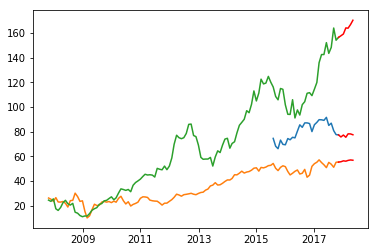

In [112]:
fig, ax = plt.subplots()
_ = ax.plot(data3.iloc[:-numberofmonths])
_ = ax.plot(data3.iloc[-(numberofmonths+1):], color = "Red")

What do you notice about our forecasts?

### 4.2 Exporting for further visualization

Next, we want to rearrange all of the data to be more like what we need for D3. Python comes with a function called `unstack()` that does just that!

Below, make a variable called **`datalist`** and set it equal to **`data3.unstack()`**.

Then show the top 10 rows of the datalist. (Hint, you've used this type of function before)

In [113]:
datalist=data3.unstack()

Almost there! We've done the hard work, now we just need it in a CSV format.

We've written this bit of code to clean the data a bit more and to output the data in a comma-separated value format.

In [114]:
csv = datalist.to_csv(header=True, index_label=['symbol','date','price'], date_format='%b %Y', index=True)
csv = csv.replace("price,0","price") # remove addition of ',0' on first line
print csv

symbol,date,price
KHC,Oct 2007,
KHC,Nov 2007,
KHC,Dec 2007,
KHC,Jan 2008,
KHC,Feb 2008,
KHC,Mar 2008,
KHC,Apr 2008,
KHC,May 2008,
KHC,Jun 2008,
KHC,Jul 2008,
KHC,Aug 2008,
KHC,Sep 2008,
KHC,Oct 2008,
KHC,Nov 2008,
KHC,Dec 2008,
KHC,Jan 2009,
KHC,Feb 2009,
KHC,Mar 2009,
KHC,Apr 2009,
KHC,May 2009,
KHC,Jun 2009,
KHC,Jul 2009,
KHC,Aug 2009,
KHC,Sep 2009,
KHC,Oct 2009,
KHC,Nov 2009,
KHC,Dec 2009,
KHC,Jan 2010,
KHC,Feb 2010,
KHC,Mar 2010,
KHC,Apr 2010,
KHC,May 2010,
KHC,Jun 2010,
KHC,Jul 2010,
KHC,Aug 2010,
KHC,Sep 2010,
KHC,Oct 2010,
KHC,Nov 2010,
KHC,Dec 2010,
KHC,Jan 2011,
KHC,Feb 2011,
KHC,Mar 2011,
KHC,Apr 2011,
KHC,May 2011,
KHC,Jun 2011,
KHC,Jul 2011,
KHC,Aug 2011,
KHC,Sep 2011,
KHC,Oct 2011,
KHC,Nov 2011,
KHC,Dec 2011,
KHC,Jan 2012,
KHC,Feb 2012,
KHC,Mar 2012,
KHC,Apr 2012,
KHC,May 2012,
KHC,Jun 2012,
KHC,Jul 2012,
KHC,Aug 2012,
KHC,Sep 2012,
KHC,Oct 2012,
KHC,Nov 2012,
KHC,Dec 2012,
KHC,Jan 2013,
KHC,Feb 2013,
KHC,Mar 2013,
KHC,Apr 2013,
KHC,May 2013,
KHC,Jun 2013,
KHC,Jul 2013,
KH

We could copy & paste this into a new CSV file for our D3.js visualization, or we could write code to do that for us.

To make the downloadable file, we've got to bring in a library called `base64` which will encode the file. Then we use that to create the file and add a bit of HTML to make it so we can download the file.

Run the cell below, and download the resulting **`stocks.csv`** file.

In [184]:
import base64
from IPython.display import HTML

b64 = base64.b64encode(csv.encode())
payload = b64.decode()
html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{filename}</a>'
html = html.format(payload=payload,title="stocks.csv",filename="stocks.csv")
HTML(html)


Now you can import this file into your D3.js visualization.

## <font color='green'>You're done!</font>

![done](https://media.giphy.com/media/15BuyagtKucHm/giphy.gif)